# STAT MID EXAM

### We combined two datasets in single CSV file mention below columns belongs to 

#### Party 
‘Party’ data contains public opinion poll surveyed a simple random sample of 100 voters. Respondents were classified by gender (male or female) and by voting preference (Republican, Democrat, or Independent)
    
    #### Gender
    #### Party

#### Insurance 
‘Insurance’ data contains information about, 
    
    #### age
    #### sex
    #### bmi
    #### children
    #### smoker
    #### region
    #### charges

In [ ]:
import pandas as pd
import csv
with open("mid.csv","r")as file:
    reader=csv.reader(file)
data=pd.read_csv("mid.csv")
data.head()

In [ ]:
Party = data.iloc[:100,:2]

In [ ]:
Insurance = data.iloc[:,2:]

_________________

# SECTION A: 8 MARKS

_________________

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#7d5b06;">1.Read the dataset(Party.xlsx) ,which contains public opinion poll surveyed a simple random sample of 100 voters. Respondents were classified by gender (male or female) and by voting preference (Republican, Democrat, or Independent).Do the men's voting preferences differ significantly from the women's preferences? Use a 0.05 level of significance.

A.Frame Null and Alternate Hypothesis ( 1 Mark)

B.State which test to be performed  (1 Mark)

C.Perform the test  (3 Mark)

D.Interpret the results  (3 Mark)


In [ ]:
#Kindly change the below cells from markdown to code and execute it 

In [ ]:
Party = data.iloc[:100,:2]

#### A.Frame Null and Alternate Hypothesis


* Ho: Gender and voting preferences are independent.

* Ha: Gender and voting preferences are not independent.

#### B.State which test to be performed

* We need to perform Chisquare test for Independence 

#### C.Perform the test

In [ ]:
import pandas as pd

df= Party

In [ ]:
pd.crosstab(df["Gender"],df["Party"])

Party,Democratic,Independent,Republic
Gender,,,
F,24,13,15
M,15,16,17


In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
chi2_contingency(pd.crosstab(df["Gender"],df["Party"]))

(2.3560375646126634, 0.307888128142274, 2, array([[20.28, 15.08, 16.64],
        [18.72, 13.92, 15.36]]))

#### D.Interpret the results 

* Since the P-value (0.307) is greater than the significance level (0.05), we fail to reject the null hypothesis. Thus, we conclude that there is no relationship between gender and voting preference.

_________________

# SECTION B: 17 MARKS

_________________

#### 2). The demand for a particular spare part was found to vary from day to day.  In a sample study the following information was obtained.

|Days|Monday|Tuesday|Wednesday|Thurshday|Friday|Saturday|
|--|--|--|--|--|--|--|
|Quality Demanded | 1124|1125|1100|1120|1126|1155|

Test the hypothesis at 1% level of significance that the number demanded depends upon the day and write your interpretations. (17 marks)

In [ ]:
# H0: The quantity demanded does not depend on Days
# H1: the quantity demanded does depend on Days.
from scipy import stats
table = [1124,1125,1110,1120,1126,1115]
dof = len(table)-1
stat_pvalue = stats.chisquare(table)
print("Chi square results are: \n ",stat_pvalue )
print ('Chisquare_ critical value is', stats.chi2.isf(0.05,dof))

Chi square results are: 
  Power_divergenceResult(statistic=0.18035714285714285, pvalue=0.9993108903947044)
Chisquare_ critical value is 11.070497693516355


Since chisquare statistic is less than chisquare critical and pvalue is alos greater than alpha(5 %) accept null hypothesis.
It means the quantity demanded does not depend on the days.

_________________

# SECTION C: 25 MARKS

_________________

### 3).	Load the dataset insurance.csv and answer below question (25 Marks)

#### a. Do charges of people who smoke differ significantly from the people who don't?(5 marks)

#### b. Does bmi of males differ significantly from that of females?(10 marks)

#### c. Is the proportion of smokers significantly different in different genders?(10 marks)

In [ ]:
#Kindly change the below cells from markdown to code and execute it 

In [ ]:
Insurance = data.iloc[:,2:]

Solution

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.stats.proportion as ssp
import scipy.stats as st
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = Insurance
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


##### a. Do charges of people who smoke differ significantly from the people who don't?(5 marks)

In [ ]:
df.smoker.value_counts()

no     803
yes    196
Name: smoker, dtype: int64

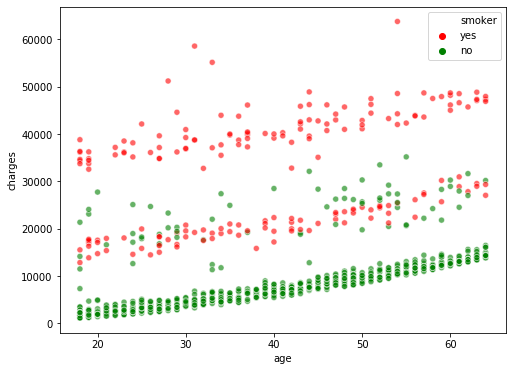

In [ ]:
#Scatter plot to look for visual evidence of dependency between attributes smoker and charges accross different ages
plt.figure(figsize=(8,6))
sns.scatterplot(df.age, df.charges,hue=df.smoker,palette= ['red','green'] ,alpha=0.6)
plt.show()

Visually the difference between charges of smokers and charges of non-smokers is apparent

In [ ]:
 # T-test to check dependency of smoking on charges
Ho = "Charges of smoker and non-smoker are same"   # Stating the Null Hypothesis
Ha = "Charges of smoker and non-smoker are not the same"   # Stating the Alternate Hypothesis

x = np.array(df[df.smoker == 'yes'].charges)  # Selecting charges corresponding to smokers as an array
y = np.array(df[df.smoker == 'no'].charges) # Selecting charges corresponding to non-smokers as an array

t, p_value  = st.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')

Charges of smoker and non-smoker are not the same as the p_value (4.845938144805176e-209) < 0.05


#### b.	Assuming bmi follows normal distribution and the variance of bmi for both male and female are same , does bmi of males differ significantly from that of females? (10 Marks)

In [ ]:
# T-test to check dependency of bmi on gender
Ho = "Gender has no effect on bmi"   # Stating the Null Hypothesis
Ha = "Gender has an effect on bmi"   # Stating the Alternate Hypothesis

x = np.array(df[df.sex == 'male'].bmi)  # Selecting bmi values corresponding to males as an array
y = np.array(df[df.sex == 'female'].bmi) # Selecting bmi values corresponding to females as an array

t, p_value  = st.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round()}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

Gender has no effect on bmi as the p_value (0.777) > 0.05


#### c.	Is the proportion of smokers significantly different in different genders?) (10 Marks)

In [ ]:
#Checking the distribution of males and females on smoking habbit
table = pd.crosstab(df.sex, df.smoker)   
table

smoker,no,yes
sex,,
female,413,81
male,390,115


In [ ]:
df.sex.value_counts()

male      505
female    494
Name: sex, dtype: int64

In [ ]:
Ho = "Gender has no effect on smoking"   # Stating the Null Hypothesis
Ha = "Gender has an effect on smoking"   # Stating the Alternate Hypothesis

z_stat, p_value = ssp.proportions_ztest([115,662],[159,676])

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')


Gender has an effect on smoking as the p_value (3.1294602675479416e-30) < 0.05
